In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

**Example 1:** A "die", the singular of dice, is a cube with six faces numbered 1, 2, 3, 4, 5, and 6. 

- Use your knowledge of simulations in Python to produce an empirical distribution of the outcome of rolling a die.
- Does the empirical distribution agree(approximately) with the theoretical distribution? 


In [34]:
a_roll_outcome = np.arange(1, 7)
a_roll_outcome

array([1, 2, 3, 4, 5, 6])

In [35]:
def simulate_one_roll():
    return np.random.choice(a_roll_outcome)

In [36]:
simulate_one_roll()

3

In [38]:
roll_results = make_array()

for i in np.arange(10_000):
    roll_results = np.append(roll_results, simulate_one_roll())
    
# See the outcomes of the 100,000 rolls of the die
roll_results

array([ 5.,  5.,  4., ...,  5.,  3.,  2.])

In [39]:
roll_table = Table().with_columns(
    'roll outcomes', roll_results,
)

roll_count = roll_table.group('roll outcomes')
roll_count

roll outcomes,count
1,1698
2,1570
3,1753
4,1647
5,1739
6,1593


In [41]:
empirical_prob = roll_count.with_column(
    "Outcome Probability", roll_count.column('count') / sum(roll_count.column('count'))
).drop('count')

empirical_prob

roll outcomes,Outcome Probability
1,0.1698
2,0.157
3,0.1753
4,0.1647
5,0.1739
6,0.1593


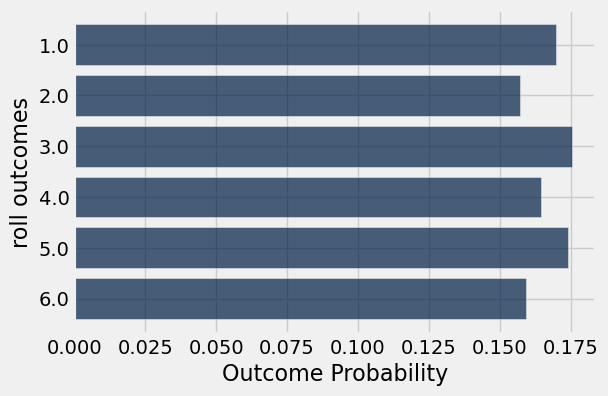

In [48]:
empirical_prob.barh('roll outcomes')

In [42]:
1 / 6

0.16666666666666666

**Example 2:** Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

## Theoretical Probability Distributions ##

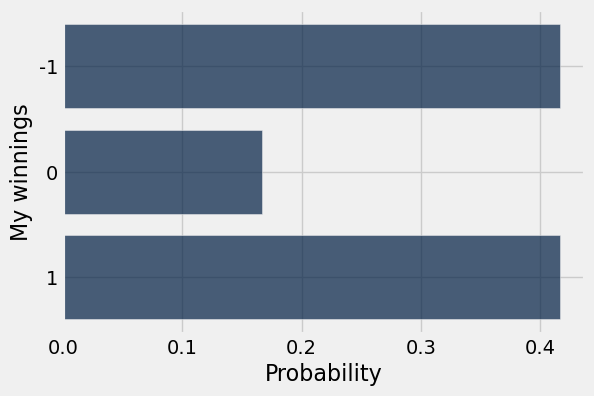

In [43]:
dice_game_prob = Table().with_columns(
    'My winnings', make_array(-1, 0, 1),
    'Probability', make_array(15/36, 6/36, 15/36)
)

dice_game_prob.barh('My winnings') # Bar chart based on the theoretical probability distribution

## Empirical Distributions ##


Can you use your knowledge of simulations to approximately validate the probability distribution above?

In [44]:
die_faces = np.arange(1, 7)

In [45]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [46]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

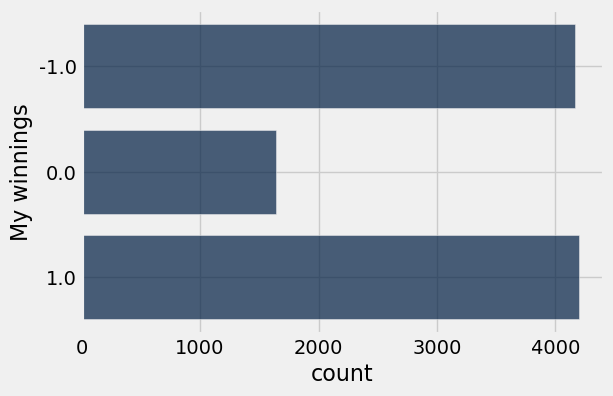

In [47]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes)

results.group('My winnings').barh('My winnings')

## Law of Large Numbers ##

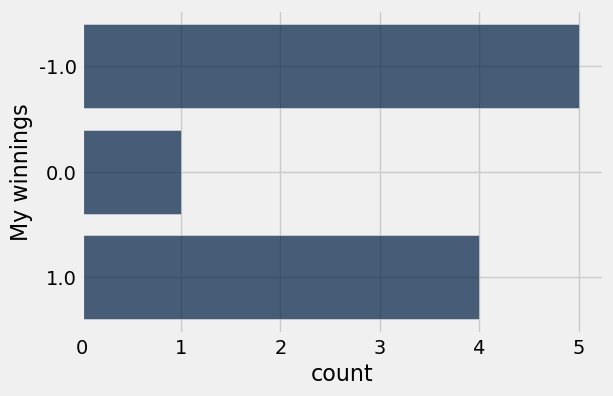

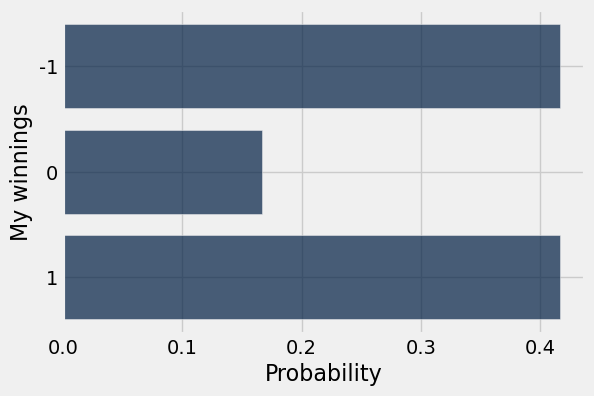

In [50]:
game_outcomes_10 = make_array()

for i in np.arange(10): # Notice how many times the simulation is set to = 10 repetitions.
    game_outcomes_10 = np.append(game_outcomes_10, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes_10)

results.group('My winnings').barh('My winnings') # Bar chart based on the empirical distribution with 10 repetitions
dice_game_prob.barh('My winnings') # Bar chart based on the theoretical probability distribution

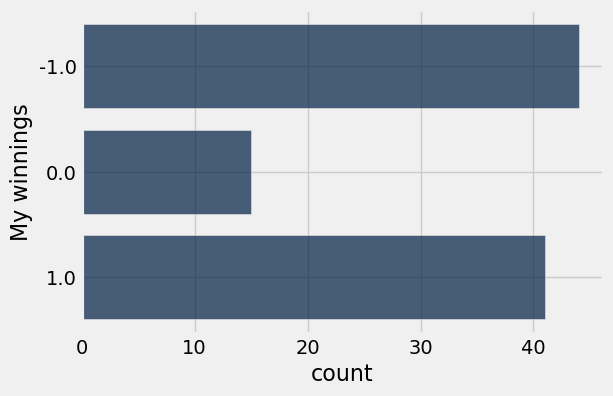

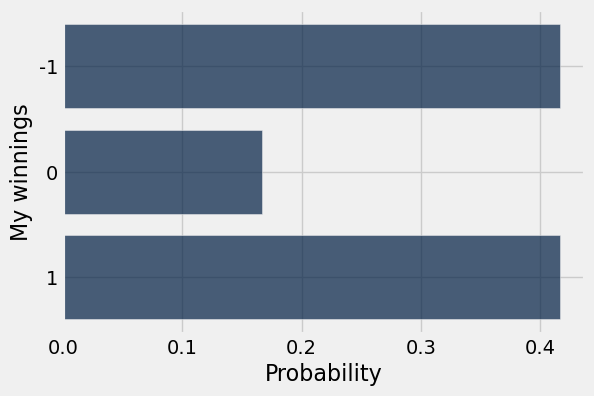

In [51]:
game_outcomes_100 = make_array()

for i in np.arange(100): # Notice how many times the simulation is set to = 100 repetitions.
    game_outcomes_100 = np.append(game_outcomes_100, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes_100)

results.group('My winnings').barh('My winnings') # Bar chart based on the empirical distribution with 100 repetitions
dice_game_prob.barh('My winnings') # Bar chart based on the theoretical probability distribution

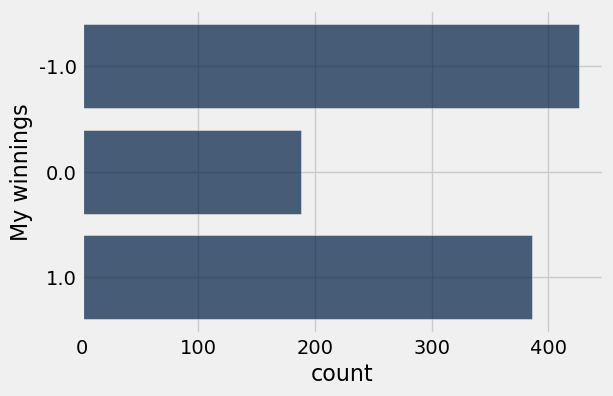

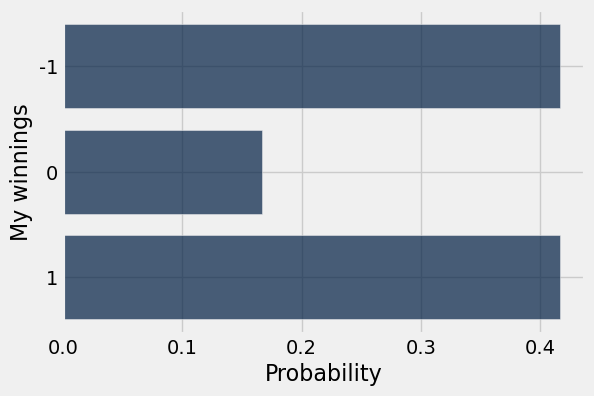

In [52]:
game_outcomes_1000 = make_array()

for i in np.arange(1000): # Notice how many times the simulation is set to = 1000 repetitions.
    game_outcomes_1000 = np.append(game_outcomes_1000, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes_1000)

results.group('My winnings').barh('My winnings') # Bar chart based on the empirical distribution with 1000 repetitions
dice_game_prob.barh('My winnings') # Bar chart based on the theoretical probability distribution

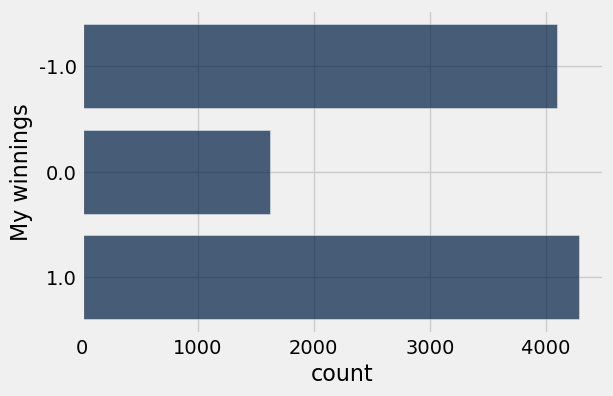

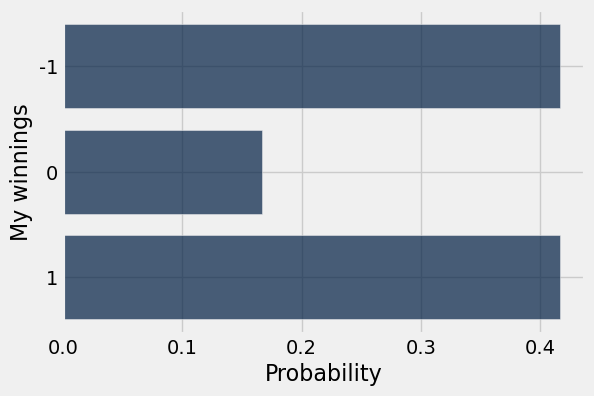

In [53]:
game_outcomes_10000 = make_array()

for i in np.arange(10000): # Notice how many times the simulation is set to = 10_000 repetitions.
    game_outcomes_10000 = np.append(game_outcomes_10000, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes_10000)

results.group('My winnings').barh('My winnings') # Bar chart based on the empirical distribution with 10000 repetitions
dice_game_prob.barh('My winnings') # Bar chart based on the theoretical probability distribution

The larger the number of repetitions, the closer the empirical distribution resembles the theoretical 
probability distribution.

## Random Sampling ##

In [54]:
music = Table.read_table('music.csv')
music = music.with_column('Row', np.arange(music.num_rows)).move_to_start('Row')
music

Row,popularity,dance,duration,energy,tempo,valence,genre
0,0,0.702,890.68,0.563,130.003,0.581,Electronic
1,0,0.534,168,0.994,130.034,0.0295,Electronic
2,0,0.744,360,0.86,129.91,0.458,Electronic
3,0,0.8,418.1,0.826,119.984,0.342,Electronic
4,0,0.541,100.339,0.803,174.069,0.294,Electronic
5,0,0.662,352.206,0.513,120,0.452,Electronic
6,0,0.706,210.027,0.863,120.029,0.258,Electronic
7,0,0.686,186.714,0.471,89.975,0.173,Electronic
8,0,0.701,389.13,0.626,120.006,0.305,Electronic
9,0,0.533,205.714,0.468,125.98,0.11,Electronic


## How to select a deterministic/convenient sample in Python ##

When you simply specify which elements of a set you want to choose based on some set characteristic(s), without any chances involved, you create a deterministic/convenient sample. While these are samples, they are not random samples. They don’t involve chance. They may not be representative of the population characteristics.

You have done this many times, for example by using `.take()`, `.where()`.




In [55]:
music.where('genre', 'Rap') 

Row,popularity,dance,duration,energy,tempo,valence,genre
1977,17,0.589,181.441,0.721,88.049,0.48,Rap
2796,21,0.635,172.965,0.581,88.051,0.569,Rap
3064,22,0.578,178.36,0.652,130.938,0.457,Rap
3366,23,0.772,269.427,0.484,135.956,0.334,Rap
4116,25,0.791,187.747,0.82,133.264,0.635,Rap
4117,25,0.691,232.72,0.699,130.238,0.374,Rap
4602,26,0.639,228.88,0.865,133.052,0.401,Rap
7883,31,0.514,176.553,0.291,81.733,0.265,Rap
11227,35,0.656,163.977,0.753,129.928,0.391,Rap
13232,37,0.686,171.525,0.67,146.932,0.303,Rap


In [56]:
music.take(make_array(34, 6321, 10040))

Row,popularity,dance,duration,energy,tempo,valence,genre
34,0,0.527,118.333,0.0633,71.974,0.21,Anime
6321,29,0.253,214.8,0.937,144.981,0.46,Anime
10040,34,0.391,135.427,0.56,120.463,0.321,Anime


In [57]:
music.take(np.arange(0, music.num_rows, 1000))

Row,popularity,dance,duration,energy,tempo,valence,genre
0,0,0.702,890.68,0.563,130.003,0.581,Electronic
1000,12,0.592,260.653,0.721,112.005,0.556,Anime
2000,18,0.531,264.187,0.949,119.968,0.345,Anime
3000,22,0.697,127.333,0.474,119.998,0.495,Anime
4000,25,0.344,211.4,0.652,179.011,0.406,Anime
5000,27,0.567,182,0.924,144.956,0.677,Anime
6000,28,0.374,470.2,0.259,144.522,0.229,Classical
7000,30,0.628,228,0.936,105.017,0.953,Anime
8000,31,0.623,216.4,0.535,126.906,0.438,Blues
9000,32,0.292,182.853,0.0214,172.621,0.119,Classical


## How to select a probabilistic/random sample in Python ##

A probability sample is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample.

In a probability sample, all elements need not have the same chance of being chosen.

In Python, you can use 

- the Table function `.take()` plus `a random start`to choose a systematic sample.
- the Table function `.sample()` to choose a Simple Random Sample of rows from your Table. By default, `.sample()` draws uniformly at random with replacement.





In [58]:
# Selecting a systematic Random Sample

start = np.random.choice(np.arange(1000))
systematic_sample = music.take(np.arange(start, music.num_rows, 1000))
systematic_sample

Row,popularity,dance,duration,energy,tempo,valence,genre
124,0,0.231,305.08,0.189,77.235,0.151,Classical
1124,13,0.595,221.133,0.942,128.045,0.677,Anime
2124,18,0.19,161.882,0.283,99.284,0.14,Anime
3124,22,0.305,461.867,0.0438,128.897,0.235,Classical
4124,25,0.611,239.987,0.716,148.276,0.81,Blues
5124,27,0.669,274.787,0.391,95.996,0.608,Jazz
6124,29,0.564,402.467,0.95,103.999,0.228,Electronic
7124,30,0.739,271.733,0.687,106.027,0.67,Jazz
8124,31,0.397,511.12,0.132,85.207,0.103,Classical
9124,33,0.591,58.587,0.183,138.967,0.388,Electronic


## Large Random Samples ##

Comparing Finite Population characteristics(and parameters) to Sample statistics.

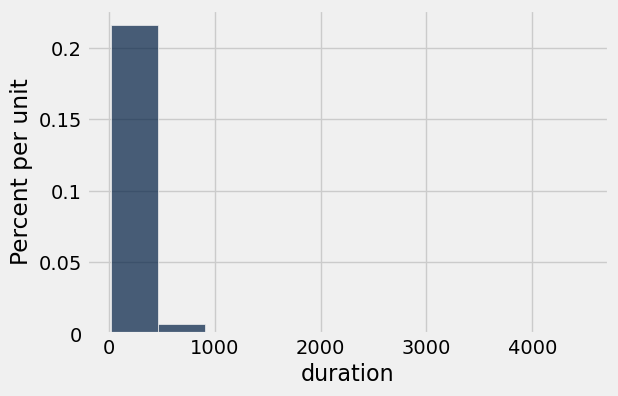

In [66]:
music.hist('duration')

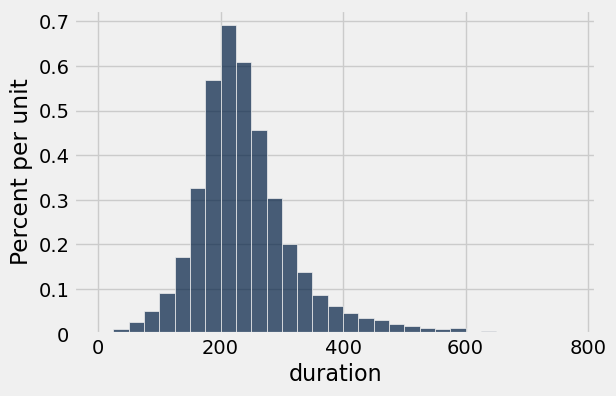

In [67]:
music_bins = np.arange(0, 800, 25)
music.hist('duration', bins=music_bins)

# Some Population Parameters

In [61]:
min(music.column('duration'))

15.509

In [62]:
max(music.column('duration'))

4497.9939999999997

Assume the entire data values of `duration` of songs are the population values. 

Compute the average duration of songs in the population data set?

In [69]:
np.average(music.column('duration'))

245.48952869822486

Does a simple random sample of ANY size of duration values represent the population characteristics or parameters well?

Let us explore...

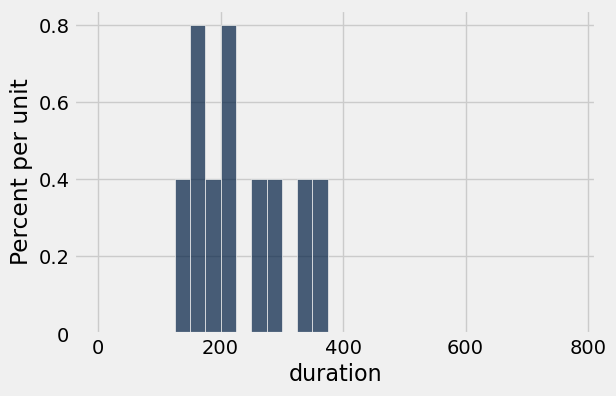

In [70]:
music.sample(10).hist('duration', bins = music_bins)

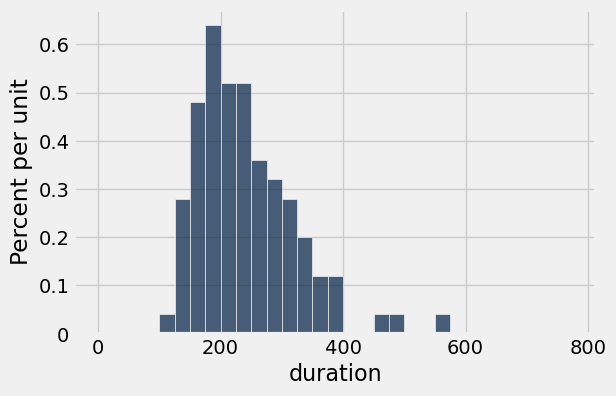

In [74]:
#Let us try a larger sample size of 1000. 
# What did you notice?

music.sample(100).hist('duration', bins = music_bins)

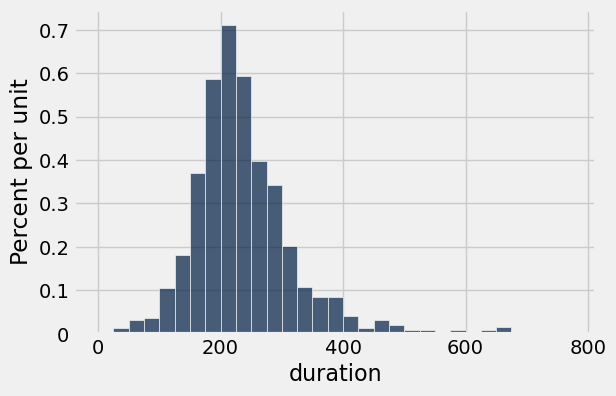

In [75]:
#Let us try a larger sample size of 1000. 
# What did you notice?

music.sample(1000).hist('duration', bins = music_bins)

- What did you notice as the sample size gets larger?
- Did we repeatedly draw the same sample size?

## An Important Example: Simulating Statistics ##

In [85]:
# Notice that a population parameter is a fixed value(which may be unknown!)
np.median(music.column('duration'))

227.53299999999999

### Step 1: Decide which statistic to simulate

In [89]:
# Depending on the sample units selected, a statistic is a random variable
# Hold Ctrl + Enter/Return buttons many times to see how the sample median varies.

np.median(music.sample(10).column('duration'))

218.76650000000001

### Step 2: Define a function that returns one simulated value of the statistic

In [91]:
def sample_median(size):
    return np.median(music.sample(size).column('duration'))

In [92]:
sample_median(10)

273.93349999999998

### Step 3: Decide how many simulated values to generate. 

### Step 4: Use a for loop to generate an array of simulated values. As usual, we will start by creating an empty array in which to collect our results. We will then set up a for loop for generating all the simulated values. 

In [93]:
sample_medians_array_10 = make_array()

for i in np.arange(1000):
    new_median_10 = sample_median(10)
    sample_medians_array_10 = np.append(sample_medians_array_10, new_median_10)

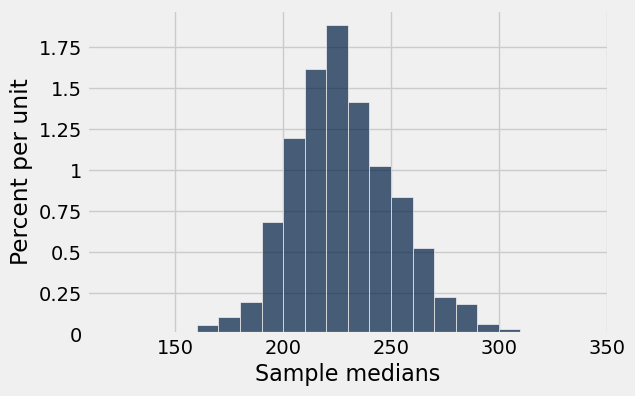

In [94]:
Table().with_column(
    'Sample medians', sample_medians_array_10
).hist(bins = np.arange(120,350, 10))

In [99]:
sample_medians_array_1000 = make_array()

for i in np.arange(1000):
    new_median_1000 = sample_median(1000)
    sample_medians_array_1000 = np.append(sample_medians_array_1000, new_median_1000)

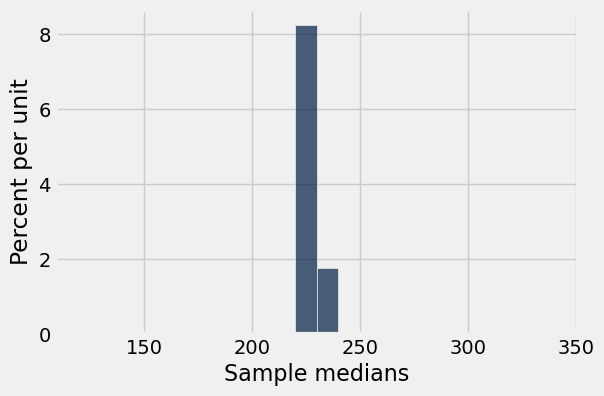

In [100]:
Table().with_column(
    'Sample medians', sample_medians_array_1000
).hist(bins = np.arange(120,350, 10))

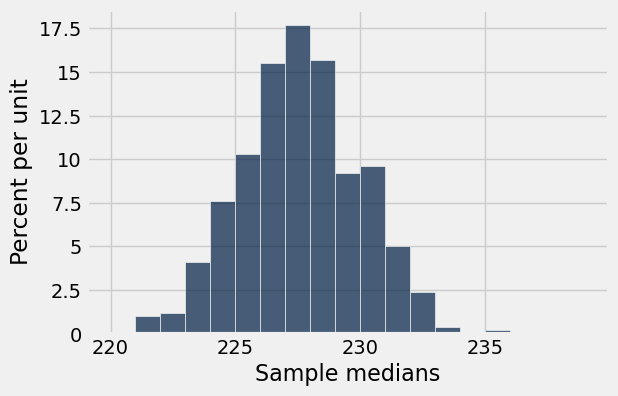

In [101]:
Table().with_column(
    'Sample medians', sample_medians_array_1000
).hist(bins = np.arange(220,240, 1))